# 3.3 示例数据集

Sklearn自带了各种数据集用于测试和验证算法的性能，要使用这些数据集，首先需要导入datasets模块：

In [2]:
from sklearn import datasets

## 3.3.1 小型标准数据集

Sklearn中的小型标准数据集又被称为玩具数据集（Toy Datasets），顾名思义，这类数据集数据量较少只是为了演示和验证常见算法的使用方法。利用这些数据集，我们可以非常方便的掌握各种模型、算法或函数的使用。

下面将以鸢尾花数据集为例，介绍其加载方法首先，查看数据集对象包含的信息：

In [3]:
from sklearn.datasets import load_iris
data = load_iris()
dir(data)  # 查看data对象成员信息

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

其中DESCR为数据集描述文本信息，data为特征数据，target为标签数据，feature_names为各维特征的名称，target_names为标签名称，filename为数据在本地的存储位置。以下代码可打印相关信息：

In [4]:
print(data.feature_names, data.target_names)  # 显示各维特征和标签名称
print(data.data.shape, data.target.shape)  # 显示特征数据和标签数据形状
print(data.filename)  # 显示数据在本地的存储位置
print(data.DESCR)  # 显示数据集描述文本信息

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)
D:\anaconda\lib\site-packages\sklearn\datasets\data\iris.csv
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05

通过以上示例不难发现，在使用该数据集对sklearn的各种模型或算法验证时，主要使用data和target两类数据。对于表3-2中的其他各种数据集，也是如此。通常，data数据都是二维数组，每行代表一个样本，每列表示一维特征，而target数据多是一维数组，每个值表示样本的标签。下面再以手写数字数据集为例，介绍其数据展示方法。

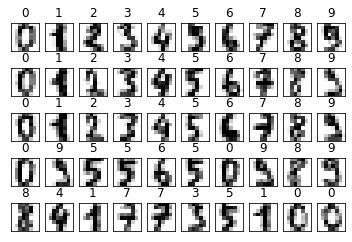

In [1]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt  # 导入绘图模块
digit = load_digits()  # 加载手写数字数据集
plt.subplots(5,10)  # 5行10列子图
for i, data in enumerate(zip(digit.data[:50], digit.target[:50])):
        plt.subplot(5, 10, i + 1, title=str(data[1]))  # 设置子图标题为标签
        plt.xticks([])  # 不显示横坐标
        plt.yticks([])  # 不显示总坐标
        plt.imshow(data[0].reshape((8, 8)), cmap=plt.cm.gray_r)  # 灰度图形显示

## 3.3.2 真实世界数据集

Sklearn提供了下载多个真实世界数据集的方法，这类数据集规模较大，需要先下载再使用。

类似于小型标准数据集，对于每个真实世界数据集，datasets模块都提供了相应的加载方法，这类方法都以“fetch_”开头。下面列举一些常用的加载函数：

下面以Olivetti人脸数据集为例，介绍数据集下载和打开方法，代码如下：

In [2]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
dir(faces)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\51748\scikit_learn_data


['DESCR', 'data', 'images', 'target']

再执行datasets.fetch_olivetti_faces()时，将直接使用之前已经下载到本地的数据集，不再在线下载。通过dir函数可看到数据集的特征数据和标签数据分别存储在data和target对象中，因此可进一步查看数据的信息，例如：

In [3]:
print(faces.data.shape, faces.target.shape)

(400, 4096) (400,)


通过分析结果，不难发现数据集共包含400个样本，每个样本为长度为4096的一维向量。这个向量实际上就是长宽均为64的人脸图像共计4096个8bit像素构成的集合，通过reshape到（64，64），可以将这些人脸图像显示处理，例如：

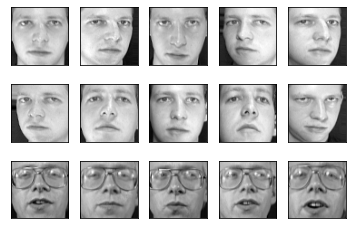

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.subplots(3, 5)  # 图像包含3行5列，共15个子图，每个子图显示一张人脸图像
for i, comp in enumerate(faces.data[:15]):  # 显示前15张人脸,其中前10张为同一人
        plt.subplot(3, 5, i + 1)
        plt.xticks([])  # 不显示横坐标
        plt.yticks([])  # 不显示总坐标
        plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray)  # 按灰度图显示图像

## 3.3.3 算法生成数据集

有时，我们需要生成一些特定分布或复杂性可控的数据集，例如环状数据。Sklearn允许用户通过设置参数由内置算法生成此类数据集。

datasets模块提供了数十个相应的生成函数，这类函数都以“make_”开头，例如 make_blobs函数为每个类分配一个或多个正态分布的点簇来创建多类数据集，make_circles函数为二分类任务生成具有球形决策边界的高斯数据集，make_moons函数生成两个交错的半圆分布的数据集等。关于这些函数的调用方法，在此不再详细介绍，读者可以自行阅读帮助说明，以下仅给出简单示例：


<IPython.core.display.Javascript object>


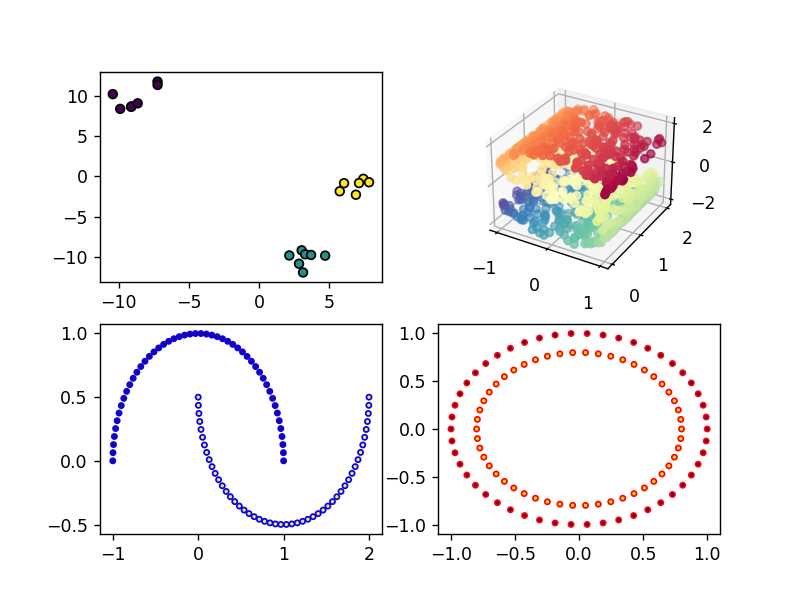

In [9]:
%matplotlib inline
from sklearn import datasets
from matplotlib import pyplot as plt
fig = plt.figure()
X1, y1 = datasets.make_blobs(n_samples=20, centers=3, n_features=2)
ax = fig.add_subplot(221)  # 左上角子图
ax.scatter(X1[:, 0], X1[:, 1], marker="o", c=y1, s=25, edgecolor="k")
X2, y2 = datasets.make_s_curve(n_samples=1000)  # 生成S曲面
ax = fig.add_subplot(222, projection='3d')  # 在右上角三维空间子图中展示
ax.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2],  c=y2, cmap=plt.cm.Spectral)
X3, y3 = datasets.make_moons()
ax = fig.add_subplot(223)  # 左下角子图
ax.scatter(X3[:, 0], X3[:, 1], marker=".", c=y3, s=35, edgecolor="b")
X4, y4 = datasets.make_circles()
ax = fig.add_subplot(224)  # 右下角子图
ax.scatter(X4[:, 0], X4[:, 1], marker=".", c=y4, s=35, edgecolor="r")